In [9]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [10]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 7:3
df = pd.read_csv('DATASET/ACB Historical Data.csv')


In [11]:
# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

In [12]:
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [13]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [14]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [15]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[30759.2091973  30774.51883158 30789.82846587 30805.13810015
 30820.44773444 30835.75736873 30851.06700301 30866.3766373
 30881.68627158 30896.99590587 30912.30554016 30927.61517444
 30942.92480873 30958.23444301 30973.5440773  30988.85371158
 31004.16334587 31019.47298016 31034.78261444 31050.09224873
 31065.40188301 31080.7115173  31096.02115158 31111.33078587
 31126.64042016 31141.95005444 31157.25968873 31172.56932301
 31187.8789573  31203.18859158]


In [16]:
# 6. Đánh giá độ chính xác test

test_ape = np.abs((y_test - y_pred) / y_test)
test_mape = np.mean(test_ape) * 100
print('MAPE: ', test_mape)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
print('RMSE: ', test_rmse)

# Hàm tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

test_mda = calculate_mda(y_test, y_pred)
print('MDA: ', test_mda)

MAPE:  18.72694730029332
RMSE:  4957.352448863115
MDA:  46.902654867256636


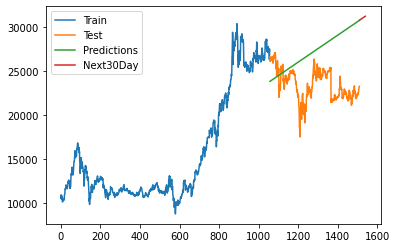

In [17]:
# 7. Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# **PVS**

In [18]:
# 1. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 7:3
df = pd.read_csv('DATASET/PVS Historical Data.csv')

In [19]:
# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)


In [20]:
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [21]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [22]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [23]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[23735.67168803 23739.84561562 23744.01954322 23748.19347082
 23752.36739842 23756.54132602 23760.71525361 23764.88918121
 23769.06310881 23773.23703641 23777.41096401 23781.5848916
 23785.7588192  23789.9327468  23794.1066744  23798.280602
 23802.45452959 23806.62845719 23810.80238479 23814.97631239
 23819.15023999 23823.32416759 23827.49809518 23831.67202278
 23835.84595038 23840.01987798 23844.19380558 23848.36773317
 23852.54166077 23856.71558837]


In [24]:
# 6. Đánh giá độ chính xác test

test_ape = np.abs((y_test - y_pred) / y_test)
test_mape = np.mean(test_ape) * 100
print('MAPE: ', test_mape)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
print('RMSE: ', test_rmse)

# Hàm tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

test_mda = calculate_mda(y_test, y_pred)
print('MDA: ', test_mda)

MAPE:  19.054319222577128
RMSE:  8084.051061329229
MDA:  48.56512141280353


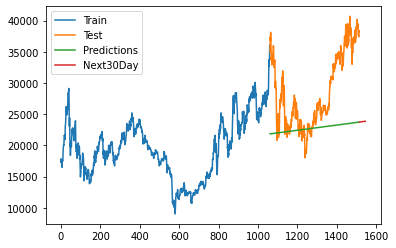

In [25]:
# 7. Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# **VNM**

In [26]:
# 1. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 7:3
df = pd.read_csv('DATASET/VNM Historical Data.csv')

In [27]:
# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

In [28]:
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [29]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [30]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [31]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[40125.58678277 40061.1500408  39996.71329883 39932.27655687
 39867.8398149  39803.40307293 39738.96633097 39674.529589
 39610.09284703 39545.65610506 39481.2193631  39416.78262113
 39352.34587916 39287.9091372  39223.47239523 39159.03565326
 39094.59891129 39030.16216933 38965.72542736 38901.28868539
 38836.85194343 38772.41520146 38707.97845949 38643.54171752
 38579.10497556 38514.66823359 38450.23149162 38385.79474966
 38321.35800769 38256.92126572]


In [32]:
# 6. Đánh giá độ chính xác test

test_ape = np.abs((y_test - y_pred) / y_test)
test_mape = np.mean(test_ape) * 100
print('MAPE: ', test_mape)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
print('RMSE: ', test_rmse)

# Hàm tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

test_mda = calculate_mda(y_test, y_pred)
print('MDA: ', test_mda)

MAPE:  24.521036445685528
RMSE:  20355.51177134358
MDA:  50.331125827814574


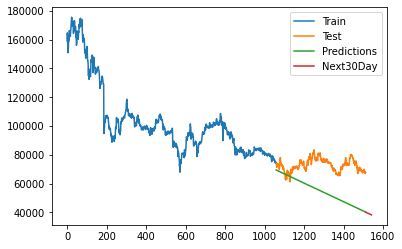

In [33]:
# 7. Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()